In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import serial
import mrtfuncs as mrtf
import os
from astropy import units as u, constants as c

In [2]:
def plotMRT(hdf):
    
    fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,5))
    ax[0,0].plot(hdf['counter'])
    ax[0,1].plot(hdf['delta_t'])
    ax[1,0].plot(hdf['nsteps_az'])
    ax[1,1].plot(hdf['nsteps_el'])
    
    return fig, ax

In [3]:
baudrate = 115200
mrtf.arduinoPort(baudrate)

'/dev/cu.usbmodem14201'

In [4]:
ser = serial.Serial(mrtf.arduinoPort(baudrate), baudrate)

In [5]:
ser.readline().split()

[b'0', b'0.00', b'xxxxxxxxxxxx', b'AZ', b'0', b'EL', b'0']

In [6]:
ser.write(b'<e-m000101000>')

14

In [7]:
rateHz = 10
nsecs = 10
Ntod = rateHz * nsecs

In [8]:
filename = 'arduino.hdf5'

In [9]:
# Create the file
if os.path.exists(filename):
    os.remove(filename)
f = h5py.File(filename, 'w')
counter = f.create_dataset('counter', (Ntod,), dtype='i')
delta_t = f.create_dataset('delta_t', (Ntod,), dtype='f')
nsteps_az = f.create_dataset('nsteps_az', (Ntod,), dtype='i')
nsteps_el = f.create_dataset('nsteps_el', (Ntod,), dtype='i')

# write to it
cnt = 0
while cnt < Ntod:
    
    if ser.inWaiting() > 0:
        
        line = ser.readline().split()
        # How to generalize this?
        counter[cnt] = int(line[0])
        delta_t[cnt] = float(line[1])
        nsteps_az[cnt] = int(line[4])
        nsteps_el[cnt] = int(line[6])
        
        cnt += 1

f.close()

In [10]:
ser.close()

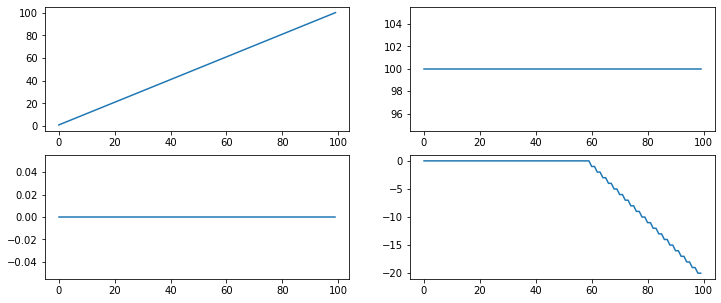

In [11]:
read = h5py.File('arduino.hdf5','r')
plotMRT(read)
read.close()

In [ ]:
read = h5py.File('arduino.hdf5','r')
plt.plot(np.diff(read['counter']))

In [ ]:
read.close()

In [ ]:
(0.1*u.deg/u.s).to(u.arcsec/u.s)*(1/(100*u.Hz))

In [ ]:
(2*u.deg/1000.).to(u.arcsec)